In [64]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [65]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

## pie chart : 카테고리별 값의 상대적 비교

In [3]:
matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [4]:
# pie chart 01

labels = ['샤넬','생로랑','티파니','펜디','에르메스']
datas = [15, 15, 20, 25, 25]
colors = ['whitesmoke','gold','skyblue','rosybrown','orange']

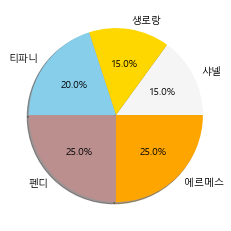

In [5]:
plt.figure()

# (autopct=% %)-->(autopct='% 1.1f% %')-->실수형으로 뒤의 한자리까지 %로 나타냄 
plt.pie(datas, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')

plt.show()
plt.close()

In [6]:
# pie chart 02

pieDF = pd.read_csv('../data/auto-mpg.csv', header=None)
pieDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [7]:
# count를 세기위한 파생변수 만들기

pieDF['cnt']=1

In [8]:
pieDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [9]:
# 제조 국가별(origin) 차량갯수를 %로 나타내기

originDF = pieDF.groupby('origin').sum()
originDF.index 

Int64Index([1, 2, 3], dtype='int64', name='origin')

In [10]:
# pie chart의 labels로 쓰려고 했지만[1,2,3]이여서 인덱스의 이름을 정해야함

originDF.index = ['USA','EU',"KOR"]
originDF.index

Index(['USA', 'EU', 'KOR'], dtype='object')

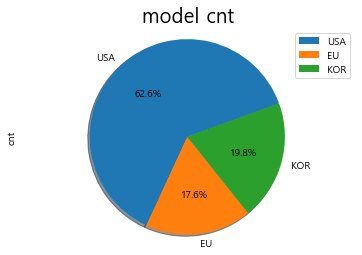

In [11]:
# dataframe으로 바로적용

plt.figure()

originDF['cnt'].plot(kind='pie', autopct='%1.1f%%', startangle=20, shadow=True) # startangle-->pie를 나누는 시작점
plt.title('model cnt', size=20)
plt.legend(labels=originDF.index, loc='upper right')
plt.axis('equal') # pie를 원형에 가깝게 만듦

plt.show()
plt.close()

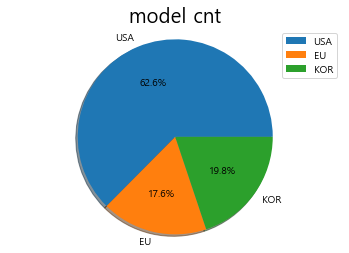

In [12]:
# ple.pie()로 적용

plt.figure()

plt.pie(originDF['cnt'].values, labels=originDF.index, shadow=True, autopct='%1.1f%%')
plt.title('model cnt', size=20)
plt.legend(labels=originDF.index, loc='upper right')
plt.axis('equal')

plt.show()
plt.close()

In [13]:
# cylinders별 차량갯수를 %로 나타내기

cylinderDF = pieDF.groupby('cylinders').sum()
cylinderDF.index = ['cyl3','cyl4','cyl5','cyl6','cyl8']
cylinderDF

,mpg,displacement,weight,acceleration,model year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


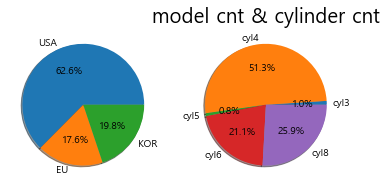

In [14]:
# 제조 국가별(origin) 차량갯수와 cylinders별 차량갯수를 subplot을 이용해 나타내기

fig = plt.figure()

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.pie(originDF['cnt'].values, labels=originDF.index, shadow=True, autopct='%1.1f%%')
ax02.pie(cylinderDF['cnt'].values, labels=cylinderDF.index, shadow=True, autopct='%1.1f%%')
plt.title('model cnt & cylinder cnt', size=20)

plt.show()
plt.close()

## histogram : 구간에 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도 수를 시각화

In [15]:
# histogram 01

datas = np.random.randn(1000)
datas

array([-5.65000762e-01,  2.27281319e-01, -9.54052472e-01, -6.76390489e-01,
        9.01854031e-01,  1.54060585e+00, -5.58303566e-01, -1.01150970e+00,
        3.34116718e-01,  2.63472535e-01, -1.35698786e+00, -6.55094695e-01,
       -1.34128051e+00, -5.24552779e-01,  1.05402660e+00,  2.20909895e+00,
       -3.05416406e-01,  1.21735758e+00,  4.85692446e-01, -3.07889971e-01,
       -1.10728383e+00, -3.35923542e-01, -1.70983563e-01, -1.26817884e+00,
        2.82497445e-01,  3.76160629e-01, -3.73317642e-01,  3.36079798e-01,
       -1.51107965e+00, -4.93091740e-01,  1.36220373e+00,  1.81833250e+00,
       -8.50988917e-01, -3.52409476e-01, -4.39351065e-01, -9.06025650e-02,
        1.48627815e+00,  9.44186609e-01, -1.24446394e+00, -5.08584643e-01,
       -5.80732990e-01, -7.10440984e-01, -1.45157880e+00, -1.88188188e-01,
       -1.89296899e+00, -3.40863731e-01, -1.10769432e+00, -8.46488219e-01,
        4.95002299e-01, -9.89344832e-01,  7.13241658e-01, -2.81023645e-01,
       -1.33190097e-01,  

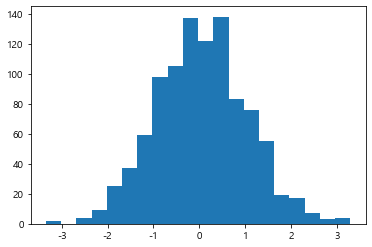

In [16]:
plt.figure()

plt.hist(datas, bins=20) # bins-->막대의 width, 클수록 막대가 촘촘해짐

plt.show()
plt.close()

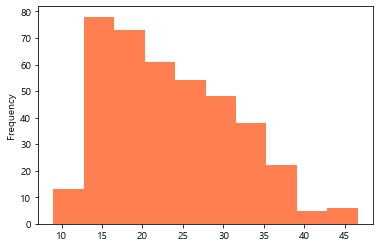

In [17]:
# histogram 02

pieDF['mpg'].plot(kind='hist', color='coral')

plt.show()
plt.close()

## 이상치 정제

In [18]:
xls = pd.ExcelFile('../data/car_mpg.xlsx')
dataDF = xls.parse(xls.sheet_names[0])
dataDF.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
# describe X : 질적자료(info)
# describe 0 : 양적자료

dataDF.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


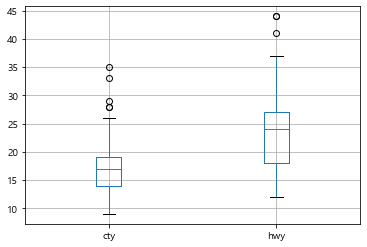

In [20]:
# cty, hwy의 이상치값을 boxplot으로 시각화
outlierDF = dataDF.filter(['cty','hwy'])

plt.figure()
outlierDF.boxplot()
plt.show()
plt.close()

In [21]:
# 분위수의 정보

quantile25 = outlierDF.quantile(q=0.25)
quantile25

cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [22]:
quantile75 = outlierDF.quantile(q=0.75)
quantile75

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [23]:
# IQR(Inter Quantile Range) : 3사분위 - 1사분위
# Median : 중의값

iqr = quantile75 - quantile25
iqr

cty    5.0
hwy    9.0
dtype: float64

In [24]:
# lower fence : 최저한계치
# upper fence : 최고한계치

lower_fence = quantile25 - 1.5 * iqr
print('lower fence : ', lower_fence)

upper_fence = quantile75 + 1.5 * iqr
print('uper fence : ' , upper_fence)

lower fence :  cty    6.5
hwy    4.5
dtype: float64
uper fence :  cty    26.5
hwy    40.5
dtype: float64


In [25]:
# 극단치 경계값(아래 수평선)
lower_outlier = outlierDF[outlierDF > lower_fence].min()
print('lower outlier : ', lower_outlier)

# 극단치 경계값(위 수평선)
upper_outlier = outlierDF[outlierDF < upper_fence].max()
print('upper outlier : ', upper_outlier)

lower outlier :  cty     9
hwy    12
dtype: int64
upper outlier :  cty    26.0
hwy    37.0
dtype: float64


In [26]:
# hwy 연비의 이상치 데이터 추출
# query : 문자열끼리의 연산, sql구문과 비슷하므로 부등호가 따옴표 안으로!

hwy_outlier_df = dataDF.query('hwy >' + str(upper_outlier['hwy']))
hwy_outlier_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [27]:
# cty 연비의 이상치 데이터 추출

cty_outlier_df = dataDF.query('cty >' + str(upper_outlier['cty']))
cty_outlier_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [28]:
# 도시연비에 대한 이상치를 결측값으로 변경
# 비교하기위해 copy
# cty_outlier_clean_df = cty_outlier_df.copy()
outlier_clean_df = dataDF.copy()

for idx in cty_outlier_df.index :
    outlier_clean_df.loc[idx, 'cty'] = np.nan

cty_outlier_clean_df

NameError: name 'cty_outlier_clean_df' is not defined

In [ ]:
# 고속도로연비에 대한 이상치를 결측값으로 변경
# 비교하기위해 copy
# hwy_outlier_clean_df = hwy_outlier_df.copy()

for idx in hwy_outlier_df.index :
    outlier_clean_df.loc[idx, 'hwy'] = np.nan

hwy_outlier_clean_df

In [ ]:
# 결측값 확인
outlier_clean_df.filter(['cty', 'hwy']).isna().sum()

In [29]:
# 결측값 제거
resultDF = outlier_clean_df.filter(['drv','cty','hwy']).dropna().groupby('drv').mean()
resultDF

,cty,hwy
drv,,
4,14.330097,19.174757
f,19.445545,27.584158
r,14.080000,21.000000


<Figure size 432x288 with 0 Axes>

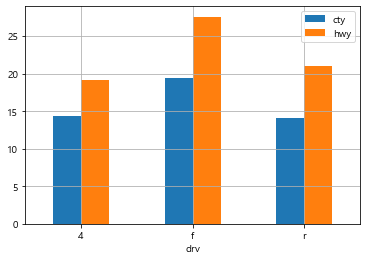

In [30]:
plt.figure()

resultDF.plot.bar(rot=0)
plt.grid()

plt.show()
plt.close()

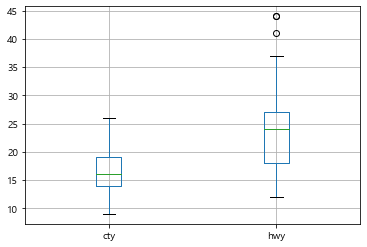

In [31]:
# 결측값 제거 확인

outlier_clean_df.filter(['cty','hwy']).boxplot()
plt.show()

## koweps_visualization.xlsx[test]

In [32]:
rowDF = pd.read_excel('../data/koweps_visualization.xlsx')
rowDF

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [33]:
rowDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


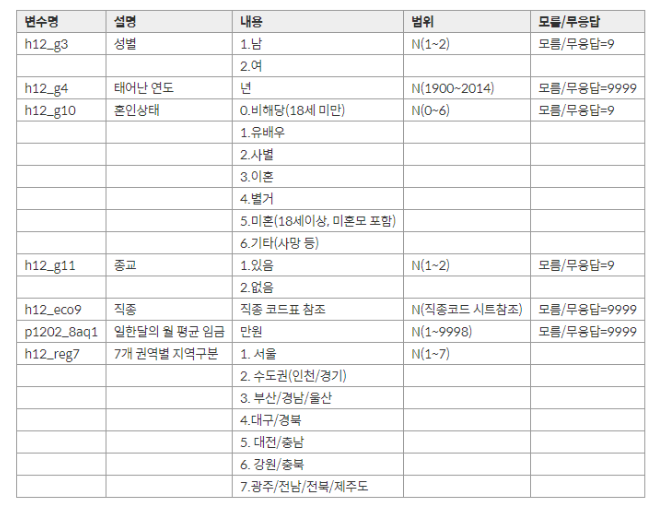

In [34]:
from IPython.display import Image

Image('c:/Users/ruby/Jupyter/numpy_img/koweps_img.png', width = 500)

### 문제1.

In [35]:
subsetDF = rowDF[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']] 
subsetDF.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
subsetDF.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [36]:
# 데이터 분석 (조사 대상자들에 대한 성별 분포)

genderDF = subsetDF.filter(['성별'])
genderDF.head()

,성별
0,2
1,2
2,1
3,1
4,2


In [37]:
# 성별의 값을 남녀로 바꿔서 확인
np.where(subsetDF.filter(['성별']) == 1, '남자', '여자')

# 성별의 값을 남녀로 바꿔서 확인한 값을 성별2 라는 새로운 컬럼에 추가
genderDF['성별2'] = np.where(subsetDF.filter(['성별']) == 1, '남자', '여자')
genderDF.head()

,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


In [38]:
# 성별의 데이터 분포 확인
genderDF['성별'].value_counts()

# 성별2의 데이터 분포확인을 데이터프레임 형식으로 표현
gender_cnt_df = pd.DataFrame(genderDF['성별2'].value_counts())
gender_cnt_df

,성별2
여자,8440
남자,6982


In [39]:
# 성별2의 컬럼명을 인원 수를 알수있는 명으로 바꿈

gender_cnt_df.rename(columns={'성별2' : '명'}, inplace=True)
gender_cnt_df

,명
여자,8440
남자,6982


In [40]:
# 성별을 비율순으로 정렬

gender_cnt_df.sort_values('명',ascending=True, inplace=True)
gender_cnt_df

,명
남자,6982
여자,8440


<Figure size 432x288 with 0 Axes>

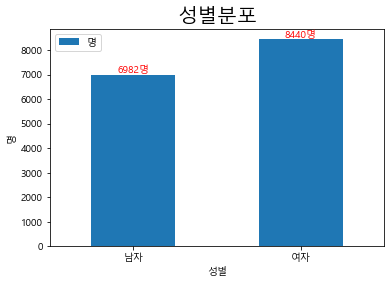

In [41]:
# 데이터 시각화(bar)

plt.figure()

gender_cnt_df.plot.bar(rot=0)

plt.title('성별분포', size=20)
plt.xlabel('성별')
plt.ylabel('명')

# 그래프 중앙에 글씨 넣기
for idx, value in enumerate(list(gender_cnt_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, horizontalalignment='center', verticalalignment='bottom', color='red')

plt.show()
plt.close()

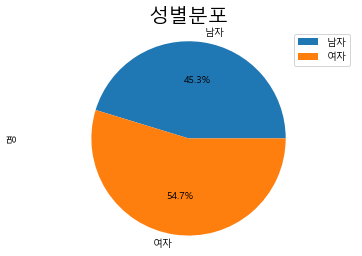

In [42]:
# 데이터 시각화(pie chart)

plt.figure()

gender_cnt_df['명'].plot.pie(labels=gender_cnt_df.index, autopct='%1.1f%%', legend=True)

plt.title('성별분포', size=20) 
plt.legend(labels=gender_cnt_df.index, loc='upper right')
plt.axis('equal')

plt.show()
plt.close()

### 문제2. 성별에 따른 일한달의 월 평균 임금의 차이를 분석하여 시각화

- 성별과 일한달의 월 평균 임금 데이터 추출
- 성별을 남자와 여자 변경
- 데이터 정제(결측값 확인, 제거)
- 데이터 분석(성별로 그룹화 그룹별 평균)
- 데이터 시각화

In [43]:
# 성별과 일한달의 월 평균 임금 데이터 추출

payDF = subsetDF[['성별', '일한달의 월 평균 임금']]
payDF.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [44]:
# 성별을 남자와 여자로 변경

payDF['성별'] = np.where(payDF.filter(['성별']) == 1, '남자', '여자')
payDF

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


In [45]:
# 데이터 정제(결측값 확인, 제거)

payDF.isna().sum()
payDF.dropna(inplace=True)
payDF

,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


In [46]:
# 데이터 분석(성별로 그룹화, 그룹별 평균)

gender_pay_df = payDF.groupby(['성별']).mean()
gender_pay_df

,일한달의 월 평균 임금
성별,
남자,333.280785
여자,175.293108


<Figure size 432x288 with 0 Axes>

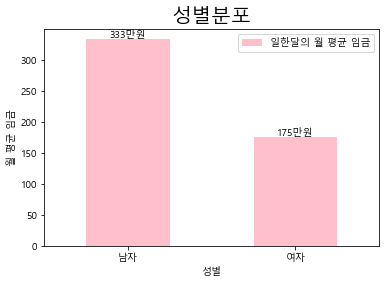

In [47]:
# 원하는 차트로 데이터 시각화

plt.figure()

gender_pay_df.plot.bar(rot=0, color='pink')

plt.title('성별분포', size=20)
plt.xlabel('성별')
plt.ylabel('월 평균 임금')

# 그래프 중앙에 글씨 넣기
for idx, value in enumerate(list(gender_pay_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt, horizontalalignment='center', verticalalignment='bottom', color='black')

plt.show()
plt.close()

### 문제3.
- 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화

In [48]:
# 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)

ageDF = subsetDF[['태어난 연도', '일한달의 월 평균 임금']]
ageDF['나이'] = 2021 - subsetDF['태어난 연도'] + 1
ageDF.head()

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,86
1,1945,NaN,77
2,1948,NaN,74
3,1942,108.9,80
4,1923,NaN,99


In [49]:
# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)

ageDF.isna().sum()
ageDF.dropna(inplace=True)
ageDF.head()

,태어난 연도,일한달의 월 평균 임금,나이
3,1942,108.9,80
10,1940,20.0,82
16,1978,322.0,44
17,1975,120.0,47
24,1975,300.0,47


In [50]:
# 데이터 분석(나이별 따른 급여평균)

age_pay_df = pd.DataFrame(ageDF.groupby('나이')['일한달의 월 평균 임금'].mean())
age_pay_df

,일한달의 월 평균 임금
나이,
24,89.333333
25,136.720000
26,140.807692
27,138.000000
28,145.652000
...,...
90,21.200000
91,25.000000
92,20.000000


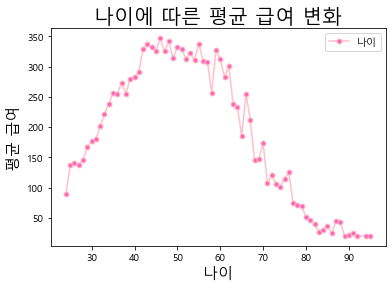

In [51]:
# 데이터 시각화

plt.figure()

plt.plot(age_pay_df, marker='o', markersize=5, color='pink', markerfacecolor='hotpink')
plt.title('나이에 따른 평균 급여 변화', size=20)
plt.xlabel('나이', size=15)
plt.ylabel('평균 급여', size=15)
plt.legend(labels=['나이'], loc='best')

plt.show()
plt.close()

### 문제4.
- 연령대에 따른 분포
- 연령대별 평균 급여 변화
- 성별과 연령대 분포
- 성별과 연령대에 따른 평균 급여 변화
- 지역별 연령층 분포와 연령층별 지역 비율


In [52]:
subsetDF['성별'] = pd.DataFrame(np.where(subsetDF.filter(['성별']) == 1, '남자', '여자'))
subsetDF['나이'] = 2021 - subsetDF['태어난 연도'] + 1
subsetDF['연령대'] = (subsetDF['나이'] // 10) * 10
subsetDF

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이,연령대
0,여자,1936,2,2,NaN,NaN,1,86,80
1,여자,1945,2,2,NaN,NaN,1,77,70
2,남자,1948,2,2,NaN,NaN,1,74,70
3,남자,1942,3,1,762.0,108.9,1,80,80
4,여자,1923,2,1,NaN,NaN,1,99,90
...,...,...,...,...,...,...,...,...,...
15417,여자,1967,1,1,952.0,NaN,5,55,50
15418,여자,1992,5,1,NaN,NaN,5,30,30
15419,남자,1995,5,1,521.0,72.0,5,27,20
15420,여자,1998,5,1,432.0,NaN,5,24,20


In [53]:
# 연령대별 평균 급여 변화

avg_pay_df = pd.DataFrame(subsetDF.groupby('연령대')['일한달의 월 평균 임금'].mean())
avg_pay

NameError: name 'avg_pay' is not defined

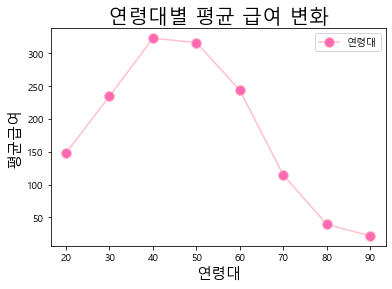

In [54]:
# 연령대별 평균 급여 변화 시각화

plt.figure()

plt.plot(avg_pay_df, marker='o', markersize=10, color='pink', markerfacecolor='hotpink')
plt.title('연령대별 평균 급여 변화', size=20)
plt.xlabel('연령대', size=15)
plt.ylabel('평균급여', size=15)
plt.legend(labels=['연령대'], loc='best')

plt.show()
plt.close()

In [55]:
# 성별과 연령대에 따른 평균 급여 변화

sex_pay_df = pd.DataFrame(subsetDF.groupby(['연령대','성별'])['일한달의 월 평균 임금'].mean()).unstack()
sex_pay_df


일한달의 월 평균 임금            
성별            남자          여자
연령대                         
0            NaN         NaN
10           NaN         NaN
20    143.745763  149.913636
30    262.242487  207.542172
40    389.867719  222.988728
50    412.900927  199.498063
60    330.166087  150.576246
70    158.890566   78.647980
80     51.730986   30.876190
90     20.000000   22.285714
100          NaN         NaN
110          NaN         NaN

<AxesSubplot:xlabel='연령대', ylabel="('일한달의 월 평균 임금', '여자')">

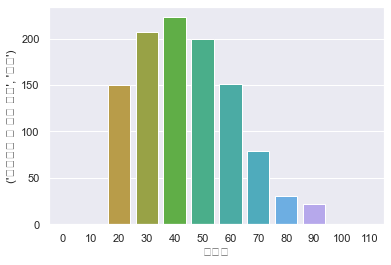

In [56]:
# 성별과 연령대에 따른 평균 급여 변화 시각화

sns.set(style='darkgrid')
sns.barplot(x = sex_pay_df.index , y = sex_pay_df['일한달의 월 평균 임금','여자'])

<AxesSubplot:xlabel='연령대', ylabel="('일한달의 월 평균 임금', '남자')">

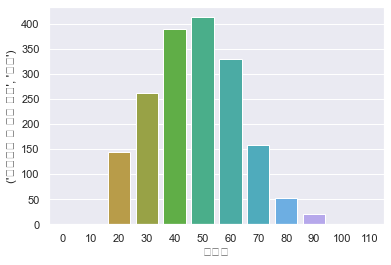

In [57]:
# 성별과 연령대에 따른 평균 급여 변화 시각화

sns.set(style='darkgrid')
sns.barplot(x = sex_pay_df.index , y = sex_pay_df['일한달의 월 평균 임금','남자'])

In [58]:
# 지역별 연령층 분포와 연령층별 지역 비율

def location(x):
    if x == 1: return '서울'
    elif x == 2: return '수도권(인천/경기)'
    elif x == 3: return '부산/경남/울산'
    elif x == 4: return '대구/경북'
    elif x == 5: return '대전/충남'
    elif x == 6: return '강원/충북'
    else: return '광주/전남/전북/제주도'
        
subsetDF['지역'] = subsetDF['7개 권역별 지역구분'].apply(location)

In [59]:
def age_cut(x):
    if x < 30: return '청년'
    elif x < 60: return '중년'
    else : return '노년'
        
subsetDF['연령층'] = subsetDF['나이'].apply(age_cut)

In [60]:
subsetDF['cnt'] = 1
subsetDF

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이,연령대,지역,연령층,cnt
0,여자,1936,2,2,NaN,NaN,1,86,80,서울,노년,1
1,여자,1945,2,2,NaN,NaN,1,77,70,서울,노년,1
2,남자,1948,2,2,NaN,NaN,1,74,70,서울,노년,1
3,남자,1942,3,1,762.0,108.9,1,80,80,서울,노년,1
4,여자,1923,2,1,NaN,NaN,1,99,90,서울,노년,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15417,여자,1967,1,1,952.0,NaN,5,55,50,대전/충남,중년,1
15418,여자,1992,5,1,NaN,NaN,5,30,30,대전/충남,중년,1
15419,남자,1995,5,1,521.0,72.0,5,27,20,대전/충남,청년,1
15420,여자,1998,5,1,432.0,NaN,5,24,20,대전/충남,청년,1


In [61]:
locDF = subsetDF.groupby(['지역','연령층'],as_index=False)['cnt'].count()
locDF

,지역,연령층,cnt
0,강원/충북,노년,589
1,강원/충북,중년,349
2,강원/충북,청년,242
3,광주/전남/전북/제주도,노년,1315
4,광주/전남/전북/제주도,중년,853
5,광주/전남/전북/제주도,청년,581
6,대구/경북,노년,1000
7,대구/경북,중년,525
8,대구/경북,청년,349
9,대전/충남,노년,599


In [62]:
locDF_pivot = locDF.pivot('지역','연령층','cnt')
locDF_pivot

연령층,노년,중년,청년
지역,,,
강원/충북,589,349,242
광주/전남/전북/제주도,1315,853,581
대구/경북,1000,525,349
대전/충남,599,446,310
부산/경남/울산,1231,826,507
서울,887,862,459
수도권(인천/경기),1270,1321,901


<Figure size 432x288 with 0 Axes>

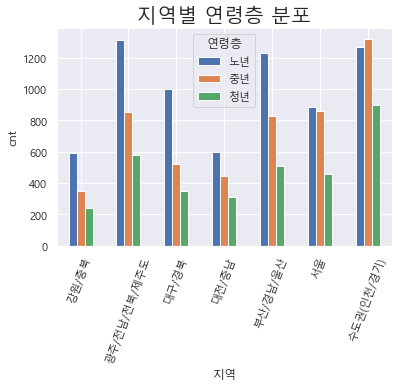

In [79]:

plt.figure()

locDF_pivot.plot(kind='bar', rot=70)
plt.xlabel('지역')
plt.ylabel('cnt')
plt.title('지역별 연령층 분포', size=20)

plt.show()
plt.close()